# Implementación inicial para detección de eventos de seguridad en SIEM usando Machine Learning

In [5]:
!pip install pandas
!pip install matplotlib scikit-learn pandas seaborn

^C



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Cargar logs antivirus
path = "C:/Users/alons/Desktop/Tesis_SIEM_ML/data/raw/Logs-antivirus_etiquetado.csv"
logs_df = pd.read_csv(path)

# Revisión inicial
logs_df.info()
logs_df['danger.type'].value_counts()
# Quitar saltos de línea y espacios
logs_df['danger.type'] = logs_df['danger.type'].str.strip().str.replace(r'[\n\r]', '', regex=True)

# Etiquetas consideradas maliciosas
maliciosos = ['Troyano', 'Virus']

# Clasificar como 1 si contiene palabra clave maliciosa
logs_df['etiqueta_binaria'] = logs_df['danger.type'].apply(
    lambda x: 1 if any(mal in x for mal in maliciosos) else 0
)

logs_df['etiqueta_binaria'].value_counts()
logs_df.to_csv("C:/Users/alons/Desktop/Tesis_SIEM_ML/data/processed/logs_antivirus_limpio.csv", index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6285 entries, 0 to 6284
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   @timestamp        6285 non-null   object
 1   host.ip           6285 non-null   object
 2   host.hostname     6285 non-null   object
 3   rule.name         6285 non-null   object
 4   rule.category     6285 non-null   object
 5   rule.description  6285 non-null   object
 6   file.path         6285 non-null   object
 7   file.hash.md5     6285 non-null   object
 8   file.hash.sha256  6285 non-null   object
 9   danger.type       6285 non-null   object
 10  virus.name        6285 non-null   object
dtypes: object(11)
memory usage: 540.2+ KB


=== Reporte de Clasificación ===
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       455
           1       0.96      0.98      0.97       802

    accuracy                           0.96      1257
   macro avg       0.96      0.95      0.96      1257
weighted avg       0.96      0.96      0.96      1257



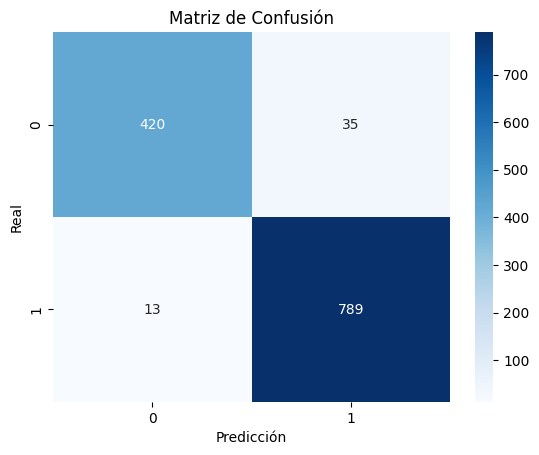

['C:/Users/alons/Desktop/Tesis_SIEM_ML/models/rf_model_antivirus.pkl']

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar dataset limpio
df = pd.read_csv("C:/Users/alons/Desktop/Tesis_SIEM_ML/data/processed/logs_antivirus_limpio.csv")

# Selección de variables predictoras
X = df[['host.ip', 'rule.name', 'rule.category', 'file.path', 'virus.name']]  # puedes ajustar aquí
X = X.fillna("desconocido")  # reemplazar nulos si los hubiera

# Codificación de variables categóricas (One-Hot Encoding)
X_encoded = pd.get_dummies(X)

# Etiqueta
y = df['etiqueta_binaria']

# Separación de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Evaluación
print("=== Reporte de Clasificación ===")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

import joblib
joblib.dump(model, "C:/Users/alons/Desktop/Tesis_SIEM_ML/models/rf_model_antivirus.pkl")

In [ ]:
print(df.columns.tolist())

['timestamp', 'host.ip', 'host.hostname', 'rule.name', 'rule.description', 'file.path', 'file.hash.md5', 'file.hash.sha256', 'virus.name', 'etiqueta_binaria', 'rule.category_Análisis antimalware', 'rule.category_Análisis antivirus AREA AVINAV', 'rule.category_Análisis antivirus SERVIDOR', 'rule.category_Detección de comportamiento', 'rule.category_File Threat Protection', 'rule.category_Malware Scan', 'rule.category_Prevención de exploits', 'rule.category_Prevención de intrusiones en el host', 'rule.category_Protección frente a amenazas en archivos', 'rule.category_Protección frente a amenazas en el correo', 'rule.category_Protección frente a amenazas web', 'rule.category_Web Threat Protection', 'danger.type_Exploit.HTML.IESlice.bt\\n\\rUsuario:', 'danger.type_Exploit.JS.Agent.avp\\n\\rUsuario:', 'danger.type_Exploit.JS.CVE-2005-1790.x\\n\\rUsuario:', 'danger.type_Exploit.JS.Fpray.a\\n\\rUsuario:', 'danger.type_Exploit.Ruby.CVE-2023-22515.a\\n\\rUsuario:', 'danger.type_HEUR:Backdoor.Ja

In [ ]:
# Importamos la libreria pandas para manipulacion de datos
import pandas as pd

# Leemos el archivo CSV que contiene los logs del sistema
# Asegurate de reemplazar "logs_SIEM.csv" por el nombre real de tu archivo
df = pd.read_csv("C:/Users/alons/Desktop/Tesis_SIEM_ML/data/processed/logs_antivirus_limpio.csv")

# Eliminamos cualquier fila que contenga valores nulos
df.dropna(inplace=True)

# Eliminamos filas duplicadas si existen
df.drop_duplicates(inplace=True)

# Convertimos la columna de tiempo (timestamp) al tipo de dato datetime
# Renombramos para facilitar su uso posterior
df.rename(columns={'@timestamp': 'timestamp'}, inplace=True)
# Convertimos el timestamp con formato personalizado
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%b %d, %Y @ %H:%M:%S.%f')

# Convertimos el timestamp con formato adecuado
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Seleccionamos columnas categóricas reales para convertirlas en variables dummy
columnas_categoricas = ['rule.name', 'rule.description', 'file.path', 'virus.name', 'danger.type']

# Transformamos texto en columnas numéricas binarias
df = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)

# Mostramos las primeras filas para verificar que todo esté correcto
df.head()


,timestamp,host.ip,host.hostname,rule.category,file.hash.md5,file.hash.sha256,etiqueta_binaria,rule.description_Malicious object detected,rule.description_Objeto malicioso detectado,rule.description_Se ha detectado un software legítimo que los intrusos pueden usar para dañar su equipo o averiguar s,...,danger.type_Troyano,danger.type_Virus,danger.type_Virus.Win32.Nimnul.a\n\rUsuario:,danger.type_Worm.MSIL.Autorun.hr\n\rUsuario:,danger.type_Worm.Win32.Autoit.xky\n\rUsuario:,danger.type_legítimo,danger.type_publicitario\n\rNombre:,danger.type_que,danger.type_software,danger.type_that
0,2024-09-29 12:06:47,10.5.32.38,93243-000582510,Análisis AREA 2DA ZONA NAVAL,7EB812B2E9D7AFC5EA2E65D9D01524C8,96BA1D40EB85F60A20224E199C18126B160FE165E727B7...,0,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,2024-09-27 12:06:15,10.5.91.70,93424-037700416,Protección frente a amenazas en archivos,64E3BCF8A472761224F5C64BCE400411,601679C07EB0F22D922AAE55E1D8EBC465DADB357F5DEC...,1,False,True,False,...,True,False,False,False,False,False,False,False,False,False
2,2024-09-27 07:56:15,10.4.236.169,60041-091685007,Prevención de exploits,5277A4B627CF3BB0639ED98982D2AF05,3DD8FD711452FB49A02E50853D6F6D202CC5506BFE6E0F...,1,False,True,False,...,True,False,False,False,False,False,False,False,False,False
3,2024-09-27 07:56:15,10.4.236.169,60041-091685007,Detección de comportamiento,5277A4B627CF3BB0639ED98982D2AF05,3DD8FD711452FB49A02E50853D6F6D202CC5506BFE6E0F...,1,False,True,False,...,True,False,False,False,False,False,False,False,False,False
4,2024-09-26 16:52:33,10.5.74.12,10101-014840002,Protección frente a amenazas en archivos,06171258B83BC183E1DB1B805C368852,B43DA1A6418A7C8B514CA80C7EDD9599667BA62EE19A78...,1,False,True,False,...,True,False,False,False,False,False,False,False,False,False


In [ ]:
# Limpiar nombres de columnas eliminando saltos de línea y espacios
df.columns = df.columns.str.replace(r'\n|\r', '', regex=True)
df.columns = df.columns.str.strip()

In [ ]:
df.rename(columns={'@timestamp': 'timestamp'}, inplace=True)

df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')


In [ ]:
# Ver todas las columnas para seleccionar las categóricas verdaderas
print(df.columns.tolist())

['timestamp', 'host.ip', 'host.hostname', 'rule.category', 'file.hash.md5', 'file.hash.sha256', 'etiqueta_binaria', 'rule.description_Malicious object detected', 'rule.description_Objeto malicioso detectado', 'rule.description_Se ha detectado un software legítimo que los intrusos pueden usar para dañar su equipo o averiguar s', 'file.path_C:\\\\$Recycle.Bin\\\\S-1-5-21-117609710-2000478354-839522115-124123\\\\$RH9H5LK.iso//ISO9660\\\\POOL\\\\MAIN\\\\C\\\\COMMIX\\\\COMMIX_3.DEB//data.tar.xz//data.tar', 'file.path_C:\\\\$Recycle.Bin\\\\S-1-5-21-117609710-2000478354-839522115-124123\\\\$RH9H5LK.iso//ISO9660\\\\POOL\\\\MAIN\\\\C\\\\COMMIX\\\\COMMIX_3.DEB//data.tar.xz//data.tar//./usr/share/commix/src/core/shells\\\\bind_tcp.py', 'file.path_C:\\\\$Recycle.Bin\\\\S-1-5-21-117609710-2000478354-839522115-124123\\\\$RH9H5LK.iso//ISO9660\\\\POOL\\\\MAIN\\\\C\\\\COMMIX\\\\COMMIX_3.DEB//data.tar.xz//data.tar//./usr/share/commix/src/core/shells\\\\reverse_tcp.py', 'file.path_C:\\\\$Recycle.Bin\\\\S

                    @timestamp       host.ip    host.hostname  \
0  Sep 29, 2024 @ 12:06:47.000    10.5.32.38  93243-000582510   
1  Sep 27, 2024 @ 12:06:15.000    10.5.91.70  93424-037700416   
2  Sep 27, 2024 @ 07:56:15.000  10.4.236.169  60041-091685007   
3  Sep 27, 2024 @ 07:56:15.000  10.4.236.169  60041-091685007   
4  Sep 26, 2024 @ 16:52:33.000    10.5.74.12  10101-014840002   

             rule.name                             rule.category  \
0  GNRL_EV_VIRUS_FOUND              Análisis AREA 2DA ZONA NAVAL   
1  GNRL_EV_VIRUS_FOUND  Protección frente a amenazas en archivos   
2  GNRL_EV_VIRUS_FOUND                    Prevención de exploits   
3  GNRL_EV_VIRUS_FOUND               Detección de comportamiento   
4  GNRL_EV_VIRUS_FOUND  Protección frente a amenazas en archivos   

                                    rule.description  \
0  Se ha detectado un software legítimo que los i...   
1                         Objeto malicioso detectado   
2                         Objeto

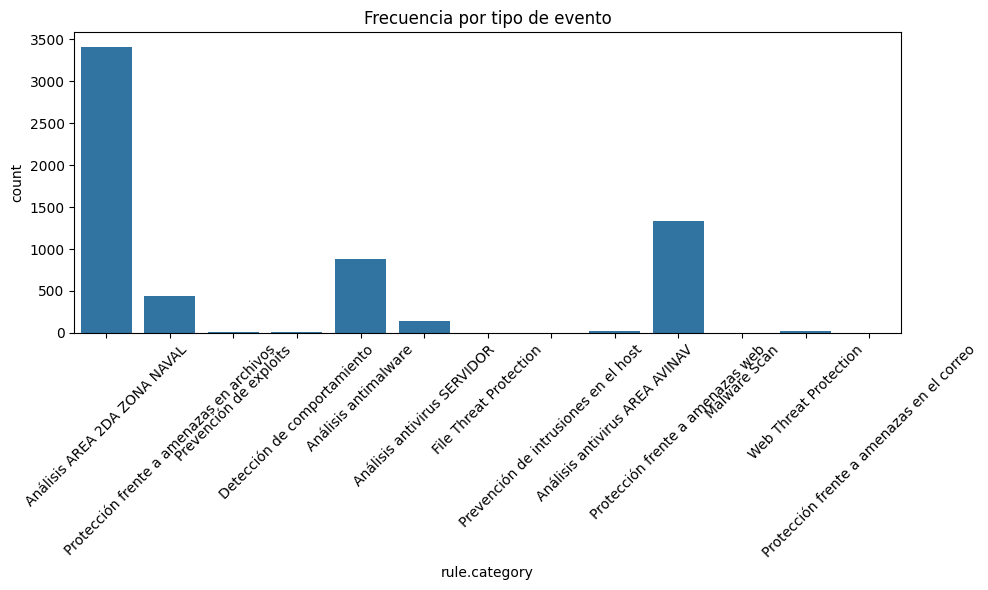

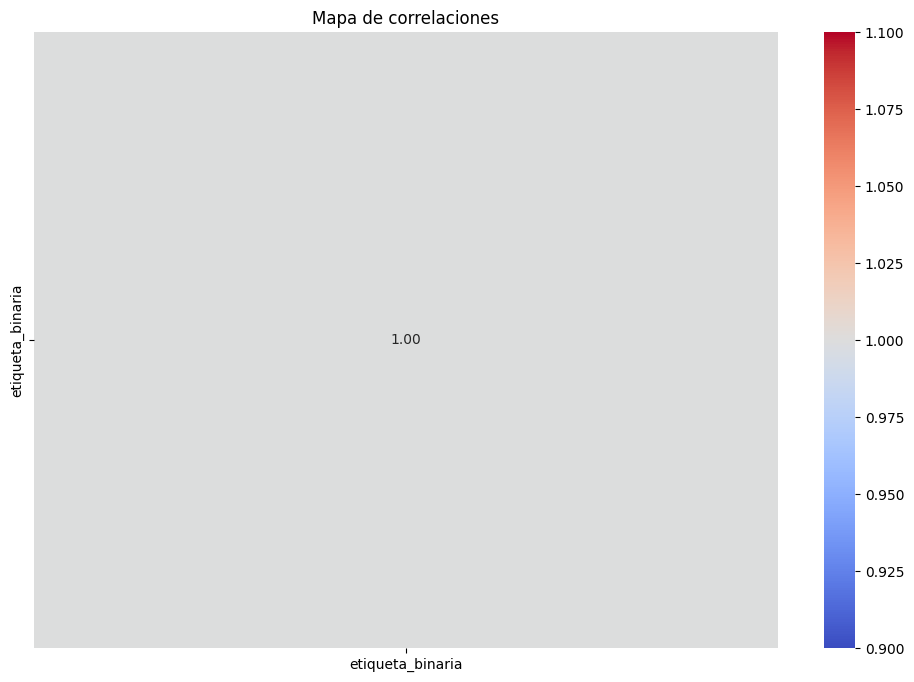

In [ ]:
# Importamos librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos el archivo CSV con las columnas que mencionaste
df = pd.read_csv('C:/Users/alons/Desktop/Tesis_SIEM_ML/data/processed/logs_antivirus_limpio.csv') 

# Verificamos las primeras filas para confirmar
print(df.head())

# ======================= GRAFICO DE FRECUENCIA POR TIPO DE REGLA ========================
plt.figure(figsize=(10, 6))
sns.countplot(x='rule.category', data=df)
plt.title("Frecuencia por tipo de evento")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ======================= MAPA DE CORRELACIONES ========================
plt.figure(figsize=(12, 8))
# Aseguramos que solo incluya columnas numéricas para la correlación
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Mapa de correlaciones")
plt.show()


In [8]:
# Importamos funciones necesarias para el modelo
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Seleccionamos las variables independientes (X) y la variable dependiente (y)
# Asegurate de que 'es_amenaza' sea el nombre correcto de tu columna objetivo (target)
X = df.drop("es_amenaza", axis=1)
y = df["es_amenaza"]

# Dividimos el conjunto de datos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creamos y entrenamos un modelo de arbol de decision (modelo base)
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)

# Realizamos predicciones sobre el conjunto de prueba
preds = modelo.predict(X_test)

# Calculamos y mostramos la precision del modelo y el reporte de clasificacion
print("Accuracy del modelo:", accuracy_score(y_test, preds))
print("Reporte de clasificacion:", classification_report(y_test, preds))

KeyError: "['es_amenaza'] not found in axis"